#  **Retrieval-Augmented Generation (RAG) from Scartch and Ollama**


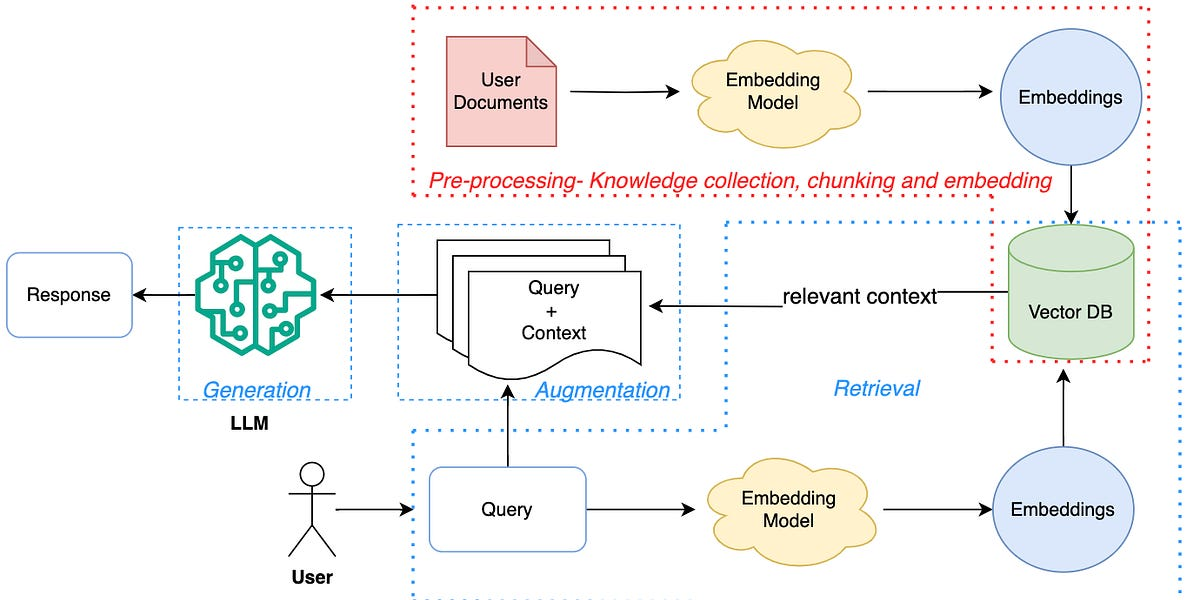

In [9]:
from IPython.display import Image, display
display(Image(filename='image.jpg'))


##  **Objective**

- To design and implement a **Retrieval-Augmented Generation (RAG)** system using **Python**.
- To integrate **information retrieval** with a **locally deployed Large Language Model (LLM)**.
- To generate **context-aware and accurate responses** to user queries.

---

##  **Introduction**

- **Retrieval-Augmented Generation (RAG)** is a modern technique in **Natural Language Processing (NLP)**.
- It combines **document retrieval** with **language generation**.
- Retrieved documents are provided as **context** to the language model.
- This approach helps in **reducing hallucinations** and improving reliability.

---

##  **Corpus Description**
- A **small text corpus** is created to act as a **knowledge base**.
- Each document contains information related to **Artificial Intelligence and Machine Learning**.
- The corpus is used to retrieve **relevant documents** based on the user query.

---

In [57]:
from collections import Counter
import math

In [58]:
corpus = [
    "Artificial intelligence is transforming modern industries.",
    "Machine learning is a subset of artificial intelligence.",
    "Deep learning uses neural networks with multiple layers.",
    "Python is the most popular language for AI development.",
    "Data preprocessing is an important step in machine learning.",
    "Supervised learning requires labeled data.",
    "Unsupervised learning works without labeled outputs.",
    "Natural language processing deals with human language.",
    "Computer vision focuses on image and video analysis.",
    "Neural networks are inspired by the human brain.",
    "Training data quality affects model performance.",
    "Overfitting occurs when a model learns noise.",
    "Underfitting happens when a model is too simple.",
    "Evaluation metrics help measure model accuracy.",
    "Feature engineering improves learning efficiency.",
    "Big data enables better predictive models.",
    "Cloud computing supports scalable AI systems.",
    "Ethical AI ensures fairness and transparency.",
    "Automation increases efficiency and productivity.",
    "AI continues to evolve rapidly."
]

print("Number of sentences:", len(corpus))
print("\nSample sentence:", corpus[0])


Number of sentences: 20

Sample sentence: Artificial intelligence is transforming modern industries.


In [60]:
query = "What is Natural Language Processing?"

In [61]:
document = (
    "Natural language processing deals with human language "
    "understanding the semantics of words, converting them "
    "into vector form and helping computers understand language."
)

##  **Cosine Similarity**

- **Cosine similarity** measures the similarity between two text vectors.
- It calculates the **cosine of the angle** between vectors.
- Higher values indicate **greater similarity**.
- Used to identify the **best matching document**.


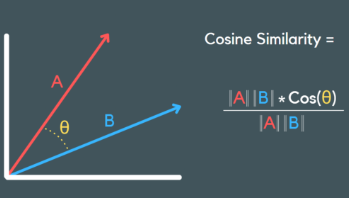

In [10]:
from IPython.display import Image, display
display(Image(filename='cos.png'))


In [64]:
query_tokens = query.lower().split(" ")
document_tokens = document.lower().split(" ")

In [65]:
query_tokens

['what', 'is', 'natural', 'language', 'processing?']

In [66]:
document_tokens

['natural',
 'language',
 'processing',
 'deals',
 'with',
 'human',
 'language',
 'understanding',
 'the',
 'semantics',
 'of',
 'words,',
 'converting',
 'them',
 'into',
 'vector',
 'form',
 'and',
 'helping',
 'computers',
 'understand',
 'language.']

In [67]:
query_counter = Counter(query_tokens)
document_counter = Counter(document_tokens)


In [68]:
document_counter

Counter({'language': 2,
         'natural': 1,
         'processing': 1,
         'deals': 1,
         'with': 1,
         'human': 1,
         'understanding': 1,
         'the': 1,
         'semantics': 1,
         'of': 1,
         'words,': 1,
         'converting': 1,
         'them': 1,
         'into': 1,
         'vector': 1,
         'form': 1,
         'and': 1,
         'helping': 1,
         'computers': 1,
         'understand': 1,
         'language.': 1})

In [69]:
query_counter

Counter({'what': 1, 'is': 1, 'natural': 1, 'language': 1, 'processing?': 1})

In [70]:
dot_product = sum(
    query_counter[token] * document_counter[token]
    for token in query_counter
)

In [71]:
dot_product

3

In [73]:
query_magnitude = math.sqrt(
    sum(freq ** 2 for freq in query_counter.values())
)
document_magnitude = math.sqrt(
    sum(freq ** 2 for freq in document_counter.values())
)

In [74]:
similarity = (
    dot_product / (query_magnitude * document_magnitude)
    if query_magnitude != 0 and document_magnitude != 0
    else 0.0
)

In [75]:
print("Cosine Similarity (manual):", similarity)

Cosine Similarity (manual): 0.27386127875258304


In [83]:
def cosine_similarity(query: str, document: str) -> float:
    query_tokens = query.lower().split(" ")
    document_tokens = document.lower().split(" ")

    query_counter = Counter(query_tokens)
    document_counter = Counter(document_tokens)

    dot_product = sum(
        query_counter[token] * document_counter[token]
        for token in query_counter
    )

    query_magnitude = math.sqrt(
        sum(freq ** 2 for freq in query_counter.values())
    )

    document_magnitude = math.sqrt(
        sum(freq ** 2 for freq in document_counter.values())
    )
    

    if query_magnitude == 0 or document_magnitude == 0:
        return 0.0

    return dot_product / (query_magnitude * document_magnitude)


In [84]:
query = "What is machine learning?"
document = "Machine learning is a field of artificial intelligence that allows systems to learn from data."
score = cosine_similarity(query, document)
print("Cosine Similarity:", score)

Cosine Similarity: 0.2581988897471611


In [52]:
corpus

['Artificial intelligence is transforming modern industries.',
 'Machine learning is a subset of artificial intelligence.',
 'Deep learning uses neural networks with multiple layers.',
 'Python is the most popular language for AI development.',
 'Data preprocessing is an important step in machine learning.',
 'Supervised learning requires labeled data.',
 'Unsupervised learning works without labeled outputs.',
 'Natural language processing deals with human language.',
 'Computer vision focuses on image and video analysis.',
 'Neural networks are inspired by the human brain.',
 'Training data quality affects model performance.',
 'Overfitting occurs when a model learns noise.',
 'Underfitting happens when a model is too simple.',
 'Evaluation metrics help measure model accuracy.',
 'Feature engineering improves learning efficiency.',
 'Big data enables better predictive models.',
 'Cloud computing supports scalable AI systems.',
 'Ethical AI ensures fairness and transparency.',
 'Automa

##  **Retrieval Process**

- The user query is compared with **all documents** in the corpus.
- Each document receives a **similarity score**.
- The document with the **highest score** is selected.
- This document acts as **context** for response generation.

In [80]:
def return_response(query, corpus):
    similarities = []

    for document in corpus:
        similarity = cosine_similarity(query, document)
        similarities.append(similarity)

    return corpus[similarities.index(max(similarities))]


In [81]:
query = "What is natural language processing?"
result = return_response(query, corpus)
print("Most relevant document:")
print(result)

Most relevant document:
Natural language processing deals with human language.


In [82]:
query = "What is machine learning?"
result = return_response(query, corpus)
print("Most relevant document:")
print(result)

Most relevant document:
Machine learning is a subset of artificial intelligence.


##  **LLM Integration Using Ollama**

- **Ollama** runs the **Large Language Model locally**.
- The notebook communicates with Ollama using an **HTTP API**.
- This enables:
  - **Offline execution**
  - **Data privacy**
  - **Low-latency responses**


In [85]:
user_input = "What is machine learning?"
relevant_document = return_response(user_input, corpus)



In [86]:
relevant_document

'Machine learning is a subset of artificial intelligence.'

In [ ]:
# user_input = "Explain natural language processing"
# relevant_document = return_response(user_input, corpus)


In [87]:
import requests
import json

full_response = []

In [88]:
prompt = """
You are an AI assistant.
Use the given context to answer the user's question clearly and briefly.
Context:
{relevant_document}
User Question:
{user_input}
Answer in 2–3 short sentences.
"""
url = "http://localhost:11434/api/generate"

data = {
    "model": "llama3",
    "prompt": prompt.format(
        user_input=user_input,
        relevant_document=relevant_document
    )
}

headers = {
    "Content-Type": "application/json"
}

response = requests.post(
    url,
    data=json.dumps(data),
    headers=headers,
    stream=True
)

try:
    for line in response.iter_lines():
        if line:
            decoded_line = json.loads(line.decode("utf-8"))
            full_response.append(decoded_line.get("response", ""))
finally:
    response.close()

print("".join(full_response))

##  **Result**

- The system successfully retrieves **relevant contextual information**.
- The generated responses are:
  - Accurate
  - Context-aware
  - Grounded in retrieved data
- Here I did not install the model Because this will take the lots of time up to 4 to 5 GB. you can go throw ollama main page and install **ollama.exe** for your on system and install the **llama3** model in your local system it will take some time and after that it will response like a chatbot 